# <font color = "green" size = 5> Problem Statement </font>

Develop a predictive model to estimate the intrest rate based on the given dataset

Column Decsription :

1. ID: Unique identifier for each loan application.
2. Amount.Requested: The amount of money requested by the borrower in the loan application.
3. Amount.Funded.By.Investors: The amount of money funded by investors for the loan.
4. Interest.Rate: The interest rate assigned to the loan, usually expressed as a percentage.
5. Loan.Length: The length of the loan, typically in months.
6. Loan.Purpose: The purpose for which the loan is being requested (e.g., debt consolidation, home improvement, etc.).
7. Debt.To.Income.Ratio: The ratio of the borrower's total monthly debt payments to their monthly income, expressed as a percentage.
8. State: The state in which the borrower resides.
9. Home.Ownership: Indicates whether the borrower owns a home (possible values may include "Rent", "Own", "Mortgage", etc.).
10. Monthly.Income: The borrower's monthly income, typically expressed in dollars.
11. FICO.Range: The FICO credit score range of the borrower. FICO scores are commonly used in credit decisions and range from 300 to 850.
12. Open.CREDIT.Lines: The number of open credit lines (e.g., credit cards, loans) the borrower currently has.
13. Revolving.CREDIT.Balance: The total amount of revolving credit (e.g., credit card balances) the borrower currently owes.
14. Inquiries.in.the.Last.6.Months: The number of inquiries made on the borrower's credit report in the last 6 months.
15. Employment.Length: The length of time the borrower has been employed, typically expressed in years.



### Importing Libraries and loading data 

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [145]:
df=pd.read_csv(r"C:\Users\HP\Downloads\loan_data_train.csv")

In [146]:
df.head(5)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


### Data cleaning and EDA 

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

In [148]:
df.columns = df.columns.str.replace('.','_') #rename the all columns

In [149]:
# # remove percentage and months from the columns 

df['Interest_Rate'] = df['Interest_Rate'].str.replace('%','')

df['Loan_Length'] = df['Loan_Length'].str.replace('months','')

df['Debt_To_Income_Ratio'] = df['Debt_To_Income_Ratio'].str.replace('%','')



In [150]:
df = df.applymap(lambda x: pd.NA if x == '.' or x == 0 else x)

In [151]:
# we were able to find the null values amongst all provided columns .
df.isnull().sum()

ID                                   1
Amount_Requested                     5
Amount_Funded_By_Investors           4
Interest_Rate                        0
Loan_Length                          2
Loan_Purpose                         1
Debt_To_Income_Ratio                 1
State                                2
Home_Ownership                       1
Monthly_Income                       3
FICO_Range                           0
Open_CREDIT_Lines                    7
Revolving_CREDIT_Balance             5
Inquiries_in_the_Last_6_Months    1108
Employment_Length                   70
dtype: int64

In [152]:
# we have somee columns and they have object datatype  but they are numeric in nature so we 
# channge their datatype  into numeric

df['Amount_Requested'] = pd.to_numeric(df['Amount_Requested'], errors='coerce')

df['Amount_Funded_By_Investors'] = pd.to_numeric(df['Amount_Funded_By_Investors'],errors='coerce')

df['Interest_Rate'] = pd.to_numeric(df['Interest_Rate'],errors='coerce')

df['Loan_Length'] = pd.to_numeric(df['Loan_Length'],errors='coerce')

df['Debt_To_Income_Ratio'] = pd.to_numeric(df['Debt_To_Income_Ratio'],errors='coerce')

df['Open_CREDIT_Lines'] = pd.to_numeric(df['Open_CREDIT_Lines'],errors='coerce')

df['Revolving_CREDIT_Balance'] = pd.to_numeric(df['Revolving_CREDIT_Balance'],errors='coerce')


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount_Requested                2195 non-null   float64
 2   Amount_Funded_By_Investors      2196 non-null   float64
 3   Interest_Rate                   2200 non-null   float64
 4   Loan_Length                     2198 non-null   float64
 5   Loan_Purpose                    2199 non-null   object 
 6   Debt_To_Income_Ratio            2199 non-null   float64
 7   State                           2198 non-null   object 
 8   Home_Ownership                  2199 non-null   object 
 9   Monthly_Income                  2197 non-null   float64
 10  FICO_Range                      2200 non-null   object 
 11  Open_CREDIT_Lines               2193 non-null   float64
 12  Revolving_CREDIT_Balance        21

In [154]:
# Drop that column which is not required

df = df.drop('ID',axis=1)
df = df.drop('Employment_Length',axis=1)
df = df.drop('State',axis=1)
df = df.drop('Home_Ownership',axis=1)
df= df.drop('Loan_Purpose',axis=1)

In [155]:
df.isnull().sum()

Amount_Requested              5
Amount_Funded_By_Investors    4
Interest_Rate                 0
Loan_Length                   2
Debt_To_Income_Ratio          1
Monthly_Income                3
FICO_Range                    0
Open_CREDIT_Lines             7
Revolving_CREDIT_Balance      5
dtype: int64

In [156]:
df['FICO_Range']=df['FICO_Range'].astype(str).str[:3]
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance
0,25000.0,25000.00,18.49,60.0,27.56,8606.56,720,11.0,15210.0
1,19750.0,19750.00,17.27,60.0,13.39,6737.50,710,14.0,19070.0
2,2100.0,2100.00,14.33,36.0,3.50,1000.00,690,13.0,893.0
3,28000.0,28000.00,16.29,36.0,19.62,7083.33,710,12.0,38194.0
4,24250.0,17431.82,12.23,60.0,23.79,5833.33,730,6.0,31061.0
...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,7083.33,675,16.0,17969.0
2196,4200.0,4200.00,14.33,60.0,14.16,3850.00,700,4.0,5718.0
2197,19800.0,19775.00,15.31,60.0,15.03,6666.67,675,10.0,46879.0
2198,18000.0,18000.00,20.99,60.0,11.63,9051.83,670,5.0,32394.0


In [157]:
df['FICO_Range'] = df['FICO_Range'].astype(str).str[:3]
df['FICO_Range'] =pd.to_numeric(df["FICO_Range"],errors='coerce')

ange = [0,669,739,799,859]
labels = ["Fair", "Good", "Very good", "Exceptional"]


df['FICO_Range_Category'] = pd.cut(df['FICO_Range'], bins=ange, labels=labels)

In [158]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Amount_Requested,2195.0,NaN,NaN,NaN,12496.469248,7856.983598,1000.0,6000.0,10000.0,17000.0,35000.0
Amount_Funded_By_Investors,2196.0,NaN,NaN,NaN,12077.803406,7775.331949,-0.01,6000.0,10000.0,16218.75,35000.0
Interest_Rate,2200.0,NaN,NaN,NaN,13.051218,4.173349,5.42,10.16,13.11,15.8,24.89
Loan_Length,2198.0,NaN,NaN,NaN,41.197452,9.887863,36.0,36.0,36.0,36.0,60.0
Debt_To_Income_Ratio,2199.0,NaN,NaN,NaN,15.371105,7.52048,0.0,9.735,15.22,20.675,34.91
Monthly_Income,2197.0,NaN,NaN,NaN,5727.45929,4073.529708,588.5,3458.0,5000.0,6883.33,102750.0
FICO_Range,2200.0,NaN,NaN,NaN,706.084091,35.263185,640.0,680.0,700.0,725.0,830.0
Open_CREDIT_Lines,2193.0,NaN,NaN,NaN,10.081623,4.497992,2.0,7.0,9.0,13.0,38.0
Revolving_CREDIT_Balance,2195.0,NaN,NaN,NaN,15335.575399,18720.803212,0.0,5600.5,11011.0,18835.5,270800.0
FICO_Range_Category,2200,4,Good,1547,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df.isnull().sum()

Amount_Requested              5
Amount_Funded_By_Investors    4
Interest_Rate                 0
Loan_Length                   2
Debt_To_Income_Ratio          1
Monthly_Income                3
FICO_Range                    0
Open_CREDIT_Lines             7
Revolving_CREDIT_Balance      5
FICO_Range_Category           0
dtype: int64

In [160]:
df['Amount_Requested'] = df['Amount_Requested'].fillna(df['Amount_Requested'].median())  

df['Amount_Funded_By_Investors'] = df['Amount_Funded_By_Investors'].fillna(df['Amount_Funded_By_Investors'].median())  

df['Loan_Length'] = df['Loan_Length'].fillna(df['Loan_Length'].median())   

df['Debt_To_Income_Ratio'] = df['Debt_To_Income_Ratio'].fillna(df['Debt_To_Income_Ratio'].median())  

df['Monthly_Income'] = df['Monthly_Income'].fillna(df['Monthly_Income'].median())    

df['Open_CREDIT_Lines'] = df['Open_CREDIT_Lines'].fillna(df['Open_CREDIT_Lines'].median())  

df['Revolving_CREDIT_Balance'] = df['Revolving_CREDIT_Balance'].fillna(df['Revolving_CREDIT_Balance'].median())

# Use the median to fill missing values when the variable has a skewed distribution or contains outliers. 
# The median is less sensitive to extreme values than the mean.

In [161]:
df.isnull().sum()

Amount_Requested              0
Amount_Funded_By_Investors    0
Interest_Rate                 0
Loan_Length                   0
Debt_To_Income_Ratio          0
Monthly_Income                0
FICO_Range                    0
Open_CREDIT_Lines             0
Revolving_CREDIT_Balance      0
FICO_Range_Category           0
dtype: int64

<Axes: xlabel='Loan_Length', ylabel='Interest_Rate'>

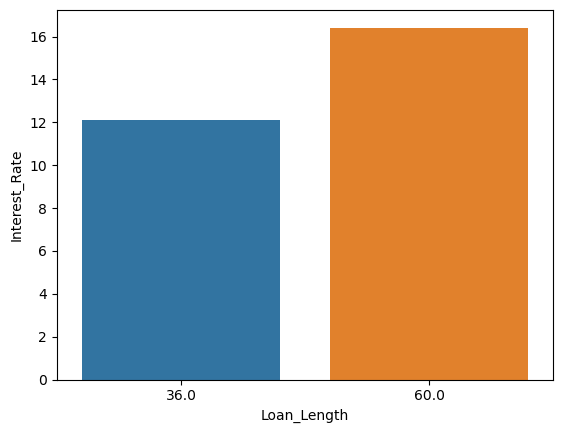

In [162]:
result = df.groupby('Loan_Length')['Interest_Rate'].mean().reset_index()
result
sns.barplot(x='Loan_Length', y='Interest_Rate', data=result)


#considering loan length of 36 have an average intrest rate of 12.12 % ,
#whereas loan length of 60 has an average intrest rate of 16.42%

<Axes: xlabel='Amount_Requested', ylabel='Density'>

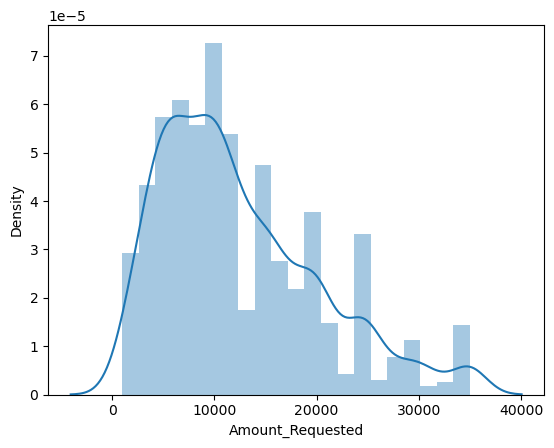

In [163]:
# Amount_Requested
sns.distplot(df.Amount_Requested)

# maximum amount requested lies in the range between  3000 to 15000
# from 15000 requested amount the density is evenly descreasing 

<Axes: xlabel='Debt_To_Income_Ratio', ylabel='Revolving_CREDIT_Balance'>

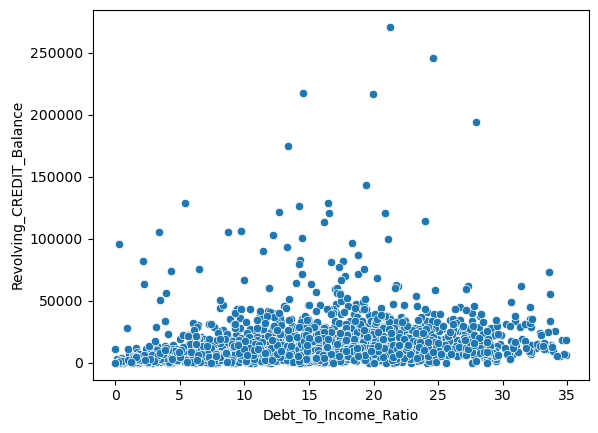

In [165]:
sns.scatterplot(x='Debt_To_Income_Ratio',y='Revolving_CREDIT_Balance', data=df)


#The scatter plot shows that there is a positive correlation between debt to income ratio and revolving credit balance.
#This means that as debt to income ratio increases,
#revolving credit balance also tends to increase

<Axes: xlabel='Amount_Funded_By_Investors', ylabel='Density'>

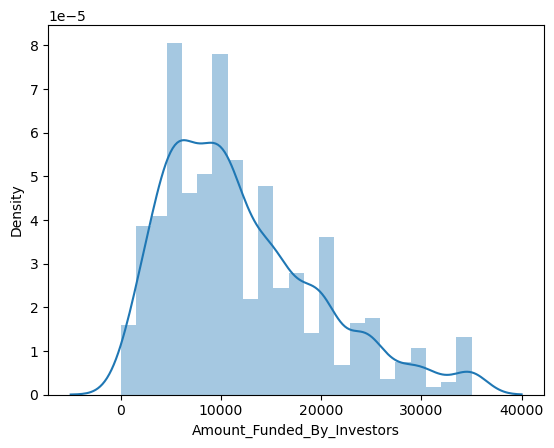

In [166]:
# Amount_Funded_By_Investors 
sns.distplot(df.Amount_Funded_By_Investors)

#Although the highest amount requested was 3000 to 12000 , and
#the maximum amount funded by investor in between range of 7000 to 14000

<Axes: xlabel='Interest_Rate', ylabel='Density'>

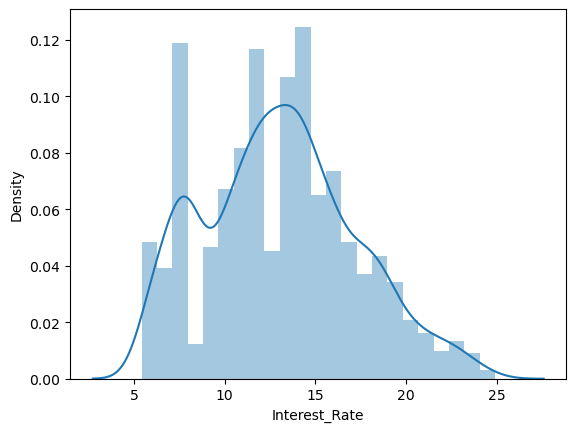

In [168]:
# Interest_Rate

sns.distplot(df.Interest_Rate)


# The Maximum intrest rate charged by investors is in range of 11 to 15 %

<Axes: >

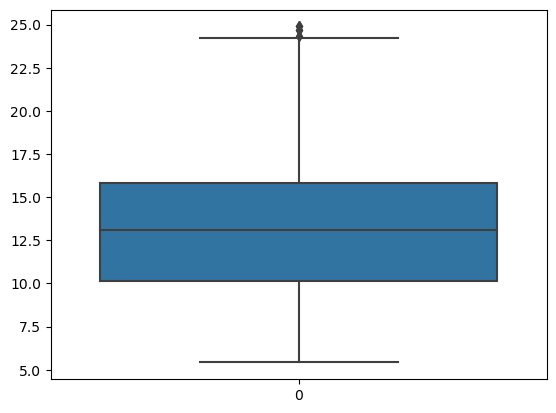

In [169]:
sns.boxplot(df.Interest_Rate)

<Axes: xlabel='Loan_Length', ylabel='count'>

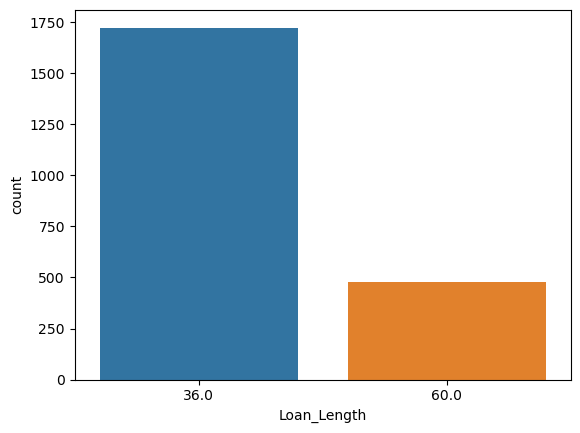

In [83]:
sns.countplot(x='Loan_Length',data=df)

# the maximum loan time period provided is for 36 moths , whereas very low count of people opted for 60 months loan  length 

<Axes: xlabel='Debt_To_Income_Ratio', ylabel='Density'>

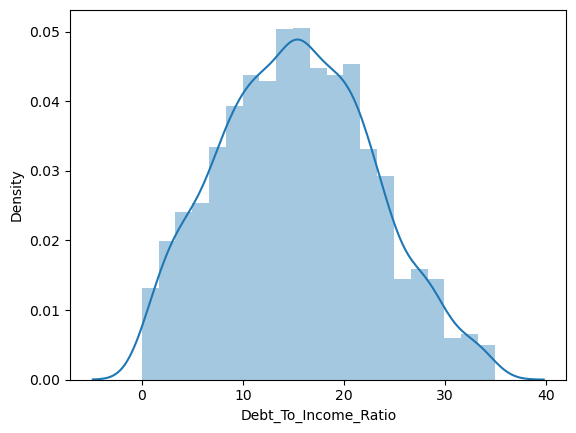

In [171]:
# Debt_To_Income_Ratio

sns.distplot(df.Debt_To_Income_Ratio)

<Axes: >

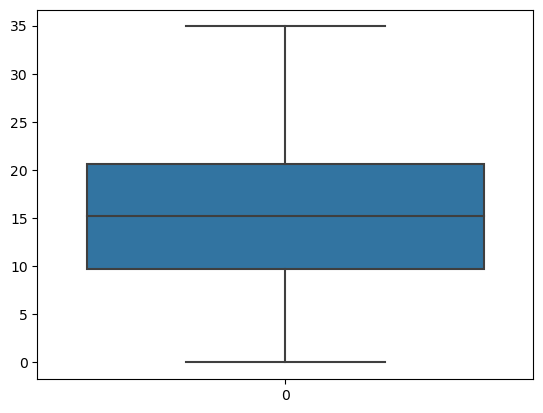

In [172]:
sns.boxplot(df.Debt_To_Income_Ratio)

<Axes: xlabel='Monthly_Income', ylabel='Density'>

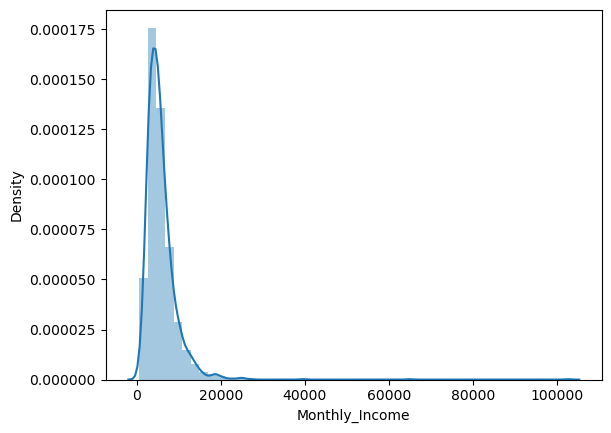

In [173]:
# Monthly_Income

sns.distplot(df.Monthly_Income)


# there are lot of people with incomes between 1000 to 20000
# there are fewer people with income between 20000 to 100000

<Axes: xlabel='Open_CREDIT_Lines', ylabel='Density'>

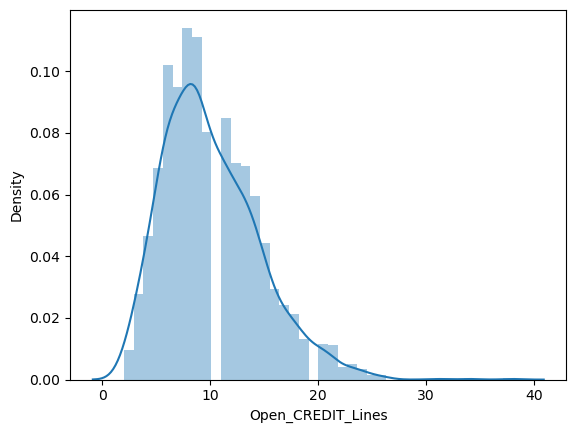

In [174]:
# Open_CREDIT_Lines

sns.distplot(df.Open_CREDIT_Lines)

<Axes: >

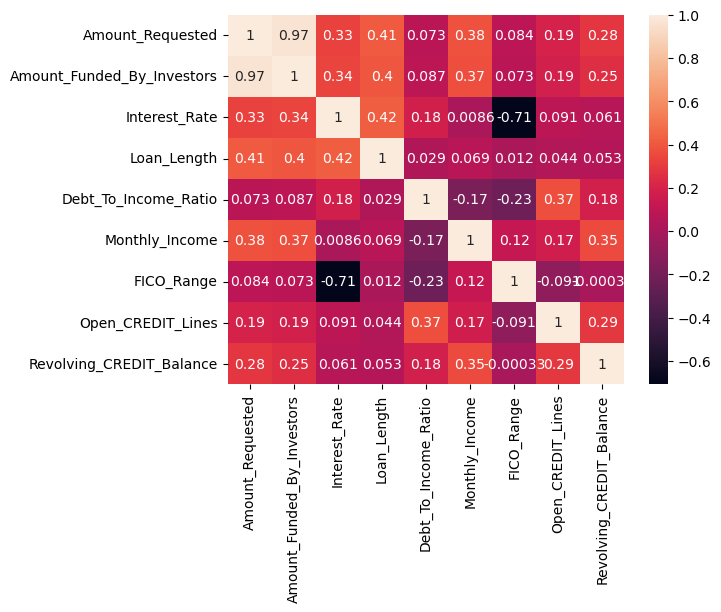

In [177]:
sns.heatmap(df.corr(),annot=True)

#strong positive correlation high  value tends to inscrease or decrease value 
# strong negative correlation low value indicate inverse relationship

# data preparation

In [178]:
df['Interest_Rate_norm'] = np.log(df.Interest_Rate)
# taking the logarithm can help make the distribution more symmetrical

<Axes: xlabel='Interest_Rate_norm', ylabel='Density'>

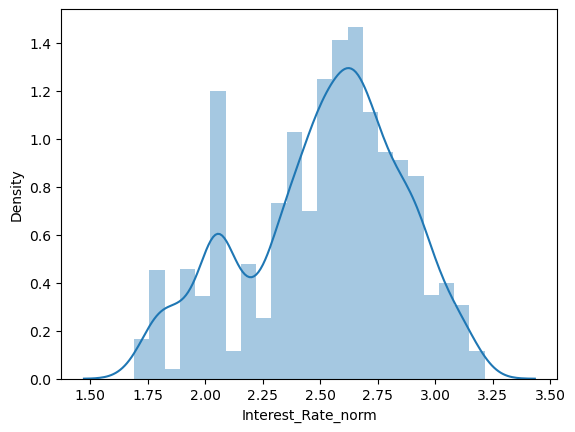

In [179]:
sns.distplot(df.Interest_Rate_norm)

<Axes: >

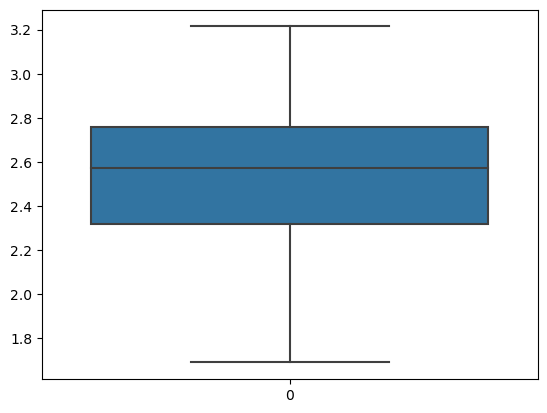

In [180]:
sns.boxplot(df.Interest_Rate_norm)

In [181]:
# creating independent variable and dependent variable 

In [182]:
x=df.drop(['Interest_Rate_norm','Interest_Rate'],axis=1)
y= df[['Interest_Rate']]

In [103]:
x=pd.get_dummies(x,columns=['FICO_Range_Category'],drop_first=True)
x

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,FICO_Range_Category_Good,FICO_Range_Category_Very good,FICO_Range_Category_Exceptional
0,25000.0,25000.00,60.0,27.56,8606.56,720,11.0,15210.0,1,0,0
1,19750.0,19750.00,60.0,13.39,6737.50,710,14.0,19070.0,1,0,0
2,2100.0,2100.00,36.0,3.50,1000.00,690,13.0,893.0,1,0,0
3,28000.0,28000.00,36.0,19.62,7083.33,710,12.0,38194.0,1,0,0
4,24250.0,17431.82,60.0,23.79,5833.33,730,6.0,31061.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,60.0,12.10,7083.33,675,16.0,17969.0,1,0,0
2196,4200.0,4200.00,60.0,14.16,3850.00,700,4.0,5718.0,1,0,0
2197,19800.0,19775.00,60.0,15.03,6666.67,675,10.0,46879.0,1,0,0
2198,18000.0,18000.00,60.0,11.63,9051.83,670,5.0,32394.0,1,0,0


In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 56)

In [105]:
X_train.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,FICO_Range_Category_Good,FICO_Range_Category_Very good,FICO_Range_Category_Exceptional
1888,17500.0,17500.0,60.0,1.78,4166.67,685,7.0,3377.0,1,0,0
831,9500.0,9500.0,36.0,16.01,4500.00,660,7.0,3673.0,0,0,0
526,30075.0,30050.0,60.0,21.54,5083.33,680,17.0,20976.0,1,0,0
1604,20800.0,20775.0,36.0,21.77,11666.67,790,6.0,682.0,0,1,0
121,25000.0,24975.0,36.0,14.72,7301.58,670,18.0,21675.0,1,0,0


In [106]:
X_test.head()

,Amount_Requested,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,FICO_Range,Open_CREDIT_Lines,Revolving_CREDIT_Balance,FICO_Range_Category_Good,FICO_Range_Category_Very good,FICO_Range_Category_Exceptional
325,7000.0,7000.00,36.0,8.02,6000.00,690,5.0,6623.0,1,0,0
756,10625.0,10625.00,36.0,12.54,4250.00,665,14.0,10767.0,0,0,0
331,8500.0,6727.42,36.0,14.68,5000.00,680,9.0,0.0,1,0,0
1448,4800.0,4800.00,36.0,23.95,3750.00,710,19.0,114509.0,1,0,0
845,5500.0,5500.00,36.0,32.16,1666.67,690,7.0,8826.0,1,0,0


In [107]:
y_train

,Interest_Rate
1888,21.00
831,21.98
526,22.95
1604,11.48
121,20.50
...,...
654,12.69
1146,16.49
1259,11.14
1442,7.90


### Linear Regression 

In [109]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(X_train,y_train)

LinearRegression()

In [110]:
print(linearregression.intercept_)
print(linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
pred = linearregression.predict(X_train)

[76.00946216]
[[ 7.88576459e-05  7.91372314e-05  1.35019388e-01 -3.76084485e-03
  -3.57880297e-05 -9.79170739e-02 -3.48870580e-02 -5.93392706e-07
  -1.11339415e+00  8.73999227e-02  3.70502962e+00]]


In [111]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance
    
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    
    
    pred = model.predict(predictors)
    
    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
   
    
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            
        },
        index=[0],
    )
    return df_perf

In [112]:
model_train_perf = model_performance_regression(linearregression,X_train,y_train)
model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,1.975801,1.539678,0.772658,0.771228


In [113]:
model_test_perf =  model_performance_regression(linearregression,X_test,y_test)
model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared
0,2.000089,1.514969,0.781862,0.776255


### Decision Tree 

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_regressor.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(dt_regressor, X_train, y_train)

,RMSE,MAE,R-squared,Adj. R-squared
0,1.963329e-16,2.523234e-17,1.0,1.0


In [119]:
model_performance_regression(dt_regressor, X_test, y_test)


,RMSE,MAE,R-squared,Adj. R-squared
0,2.623718,1.975455,0.624623,0.614975


### Decision Tree ( Pruned ) 

In [211]:
# Create a Decision Tree Regressor with pre-pruning (max_depth=5 for example)
dt_regressor_pruned = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the pruned model on the training data
dt_regressor_pruned.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred_pruned = dt_regressor_pruned.predict(X_train)
y_test_pred_pruned = dt_regressor_pruned.predict(X_test)

# Evaluate the pruned model performance on the training set
model_performance_regression(dt_regressor_pruned, X_train, y_train)



,RMSE,MAE,R-squared,Adj. R-squared
0,1.888659,1.465553,0.79227,0.790963


In [212]:
# Evaluate the pruned model performance on the test set
model_performance_regression(dt_regressor_pruned, X_test, y_test)

,RMSE,MAE,R-squared,Adj. R-squared
0,2.039962,1.585561,0.773077,0.767245


### Randomforest 

In [122]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train.values.ravel())  # Flatten y_train if it's a DataFrame

# Make predictions on the training and test data
y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(rf_regressor, X_train, y_train.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared
0,0.711543,0.537543,0.970515,0.97033


In [123]:
# Evaluate the model performance on the test set
model_performance_regression(rf_regressor, X_test, y_test)

,RMSE,MAE,R-squared,Adj. R-squared
0,1.914254,1.405615,0.800183,0.795047


### Bagging 

In [198]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a Decision Tree Regressor (base model)
base_model = DecisionTreeRegressor(random_state=42)

# Create a Bagging Regressor with 100 base models
bagging_regressor = BaggingRegressor(base_model, n_estimators=50, random_state=42)

# Fit the Bagging Regressor on the training data
bagging_regressor.fit(X_train, y_train.values.ravel())

# Make predictions on the training and test data
y_train_pred_bagging = bagging_regressor.predict(X_train)
y_test_pred_bagging = bagging_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(bagging_regressor, X_train, y_train.values.ravel())


,RMSE,MAE,R-squared,Adj. R-squared
0,0.7272,0.544703,0.969204,0.96901


In [199]:
model_performance_regression(bagging_regressor, X_test, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared
0,1.914308,1.407628,0.800171,0.795036


### AdaBoost

In [201]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a base Decision Tree Regressor
base_regressor = DecisionTreeRegressor(max_depth=3)

# Create AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_regressor, n_estimators=100, random_state=42)

# Fit the model on the training data
adaboost_regressor.fit(X_train, y_train.values.ravel())

# Make predictions on the training and test data
y_train_pred_ab = adaboost_regressor.predict(X_train)
y_test_pred_ab = adaboost_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(adaboost_regressor, X_train, y_train.values.ravel())



,RMSE,MAE,R-squared,Adj. R-squared
0,2.228405,1.859705,0.710812,0.708992


In [197]:
model_performance_regression(adaboost_regressor, X_test, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared
0,2.33748,1.894877,0.70206,0.694402


### Gradient Boosting 

In [192]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create Gradient Boosting Regressor
gradient_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)

# Fit the model on the training data
gradient_regressor.fit(X_train, y_train.values.ravel())

# Make predictions on the training and test data
y_train_pred_gb = gradient_regressor.predict(X_train)
y_test_pred_gb = gradient_regressor.predict(X_test)

# Evaluate the model performance on the training set
model_performance_regression(gradient_regressor, X_train, y_train.values.ravel())


,RMSE,MAE,R-squared,Adj. R-squared
0,1.677501,1.296906,0.836123,0.835092


In [193]:
model_performance_regression(gradient_regressor, X_test, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared
0,1.815035,1.370935,0.82036,0.815743


### XGBoost 

In [214]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred_xgb = xgb_regressor.predict(X_train)
y_test_pred_xgb = xgb_regressor.predict(X_test)


In [215]:
model_performance_regression(xgb_regressor, X_train, y_train.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared
0,1.687301,1.303267,0.834203,0.833159


In [217]:
model_performance_regression(xgb_regressor, X_test, y_test.values.ravel())

,RMSE,MAE,R-squared,Adj. R-squared
0,1.81531,1.372692,0.820305,0.815687


### Overall Models comparison

In [222]:

data = {
    'Model': ['Linear Regression (sklearn)',  'Decision Tree (Base)',
              'Decision Tree (Pre Pruning)', 'Random Forest', 'Bagging', 'Adaboost', 'Gradient Boosting', 'XG Boost'],
    'Train_RMSE': [1.975801,1.963329e-16,1.888659,0.711543,0.7272,0.228405,1.677501,1.687301],
    'Train_MAE': [1.539678,2.523234e-17,1.465553,0.537543,0.544703,1.859705,1.296906,1.303267],
    'Train_R-squared': [0.772658,1.0,0.79227,0.970515,0.969204,0.710812,0.836123,0.834203],
    'Train_Adj. R-squared': [0.771228,1.0,0.790963,0.97033,0.96901,0.708992,0.835092,0.833159],
   
    
    'Test_RMSE': [2.000089,2.623718,2.039962,1.914254,1.914308,2.33748,1.815035,1.81531],
    'Test_MAE': [1.514969,1.975455,1.585561,1.405615,1.407628,1.894877,1.270935,1.372692],
    'Test_R-squared': [0.781862,0.624623,0.773077,0.800183,0.800171,0.70206,0.82036,0.820305],
    'Test_Adj. R-squared': [0.776255,0.614975,0.767245,0.795047,0.795035,0.694402,0.815743,0.815743,],
    
}

fdf = pd.DataFrame(data)
fdf

,Model,Train_RMSE,Train_MAE,Train_R-squared,Train_Adj. R-squared,Test_RMSE,Test_MAE,Test_R-squared,Test_Adj. R-squared
0,Linear Regression (sklearn),1.975801e+00,1.539678e+00,0.772658,0.771228,2.000089,1.514969,0.781862,0.776255
1,Decision Tree (Base),1.963329e-16,2.523234e-17,1.000000,1.000000,2.623718,1.975455,0.624623,0.614975
2,Decision Tree (Pre Pruning),1.888659e+00,1.465553e+00,0.792270,0.790963,2.039962,1.585561,0.773077,0.767245
3,Random Forest,7.115430e-01,5.375430e-01,0.970515,0.970330,1.914254,1.405615,0.800183,0.795047
4,Bagging,7.272000e-01,5.447030e-01,0.969204,0.969010,1.914308,1.407628,0.800171,0.795035
5,Adaboost,2.284050e-01,1.859705e+00,0.710812,0.708992,2.337480,1.894877,0.702060,0.694402
6,Gradient Boosting,1.677501e+00,1.296906e+00,0.836123,0.835092,1.815035,1.270935,0.820360,0.815743
7,XG Boost,1.687301e+00,1.303267e+00,0.834203,0.833159,1.815310,1.372692,0.820305,0.815743


### Business Observation 

Analyzing how well different models predict loan outcomes based on various factors can help lenders make smarter decisions about who to approve for loans, how much interest to charge, and how to manage risk. Using advanced techniques that accurately predict these outcomes can make the lending process more efficient and lead to happier customers who are more likely to stick with the lender.